In [1]:

library(tidyverse)
library(tidymodels)
library(lubridate)
library(GGally)
library(ISLR)
library(tidyclust)
library(forcats)
library(repr)
library(ggplot2)
library(infer)
library(cowplot)
options(repr.matrix.max.rows = 6)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

The love of videogames many players have extends beyond the scope of game play itself. Among the most significant areas of such passion is through the purchase of newsletters. These newsletters can be used to keep players informed about new game features, upcoming events, exclusive offers, and other privileged knowledge. They are not only a marketing tool, but they are also employed in the formation and maintenance of player communities. It makes sense that gaming companies would value knowing who is most likely to subscribe to these newsletters. Companies that can determine the predicting traits of future subscribers will be able to tailor their marketing to be more attractive to the player.

This project attempts to identify the impact that each player’s characteristics and behaviour has on predicting a player's likelihood of subscribing to a newsletter. and how do these features differentiate between categories of players? Specifically, whether measures such as age, experience, and total hours played could be predictors of whether a player will subscribe. The desired result was to develop a predictive model that would differentiate between the subscribers and the non-subscribers based on these variables, and find the most correlated attributes to the state of being a subscriber.

In [2]:
url <- "https://raw.githubusercontent.com/Michael50505/project_dsci/refs/heads/main/players.csv"
player <- read_csv(url)
head(player)

url <- "https://raw.githubusercontent.com/Michael50505/project_dsci/refs/heads/main/sessions.csv"
session <- read_csv(url)
head(session)


Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


In [30]:
#options(repr.plot.width = 9, repr.plot.height = 9)
#clean_player <- player |> select(-hashedEmail, -name)
#player_pairplot <- clean_player |> 
#    ggpairs(mapping = aes(alpha = 0.4)) +
#    theme(text = element_text(size = 20))
#player_pairplot

In [31]:
session <- session |>
  mutate(
    session_start = ymd_hms(start_time),
    session_end = ymd_hms(end_time),
    duration_hours = as.numeric((session_end - session_start)/3600, units = "hours"))

In [32]:
hours_per_player <- session |>
  group_by(hashedEmail) |>
  summarise(total_hours_played = sum(duration_hours, na.rm = TRUE))

In [33]:
df <- player |>
  left_join(hours_per_player, by = "hashedEmail") |>
  filter(!is.na(Age), !is.na(experience), !is.na(subscribe), !is.na(total_hours_played)) %>%
  mutate(subscribe = as.factor(subscribe))

# A tibble: 1 × 2
  neighbors .config              
      <dbl> <chr>                
1         8 Preprocessor1_Model08


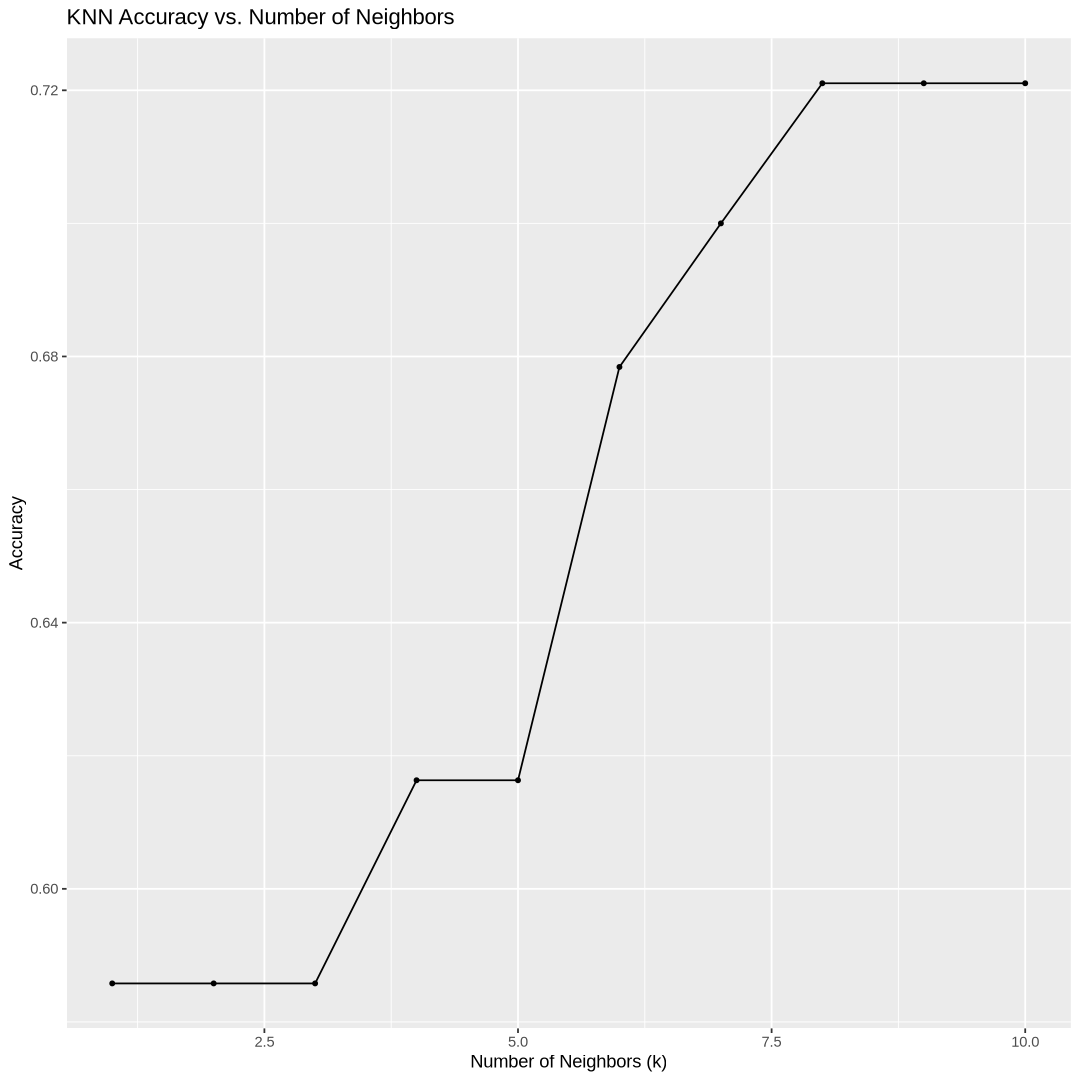

In [34]:
set.seed(4321)

knn_model_tuned <- nearest_neighbor(
  mode = "classification",
  neighbors = tune()) |>
  set_engine("kknn")

knn_recipe <- recipe(subscribe ~ ., data = train_data) |>
  step_normalize(all_numeric_predictors())

knn_workflow_tuned <- workflow() |>
  add_recipe(knn_recipe) |>
  add_model(knn_model_tuned)

cv_folds <- vfold_cv(train_data, v = 5, strata = subscribe)

k_grid <- tibble(neighbors = seq(1, 10, by = 1))

tuned_results <- tune_grid(
  knn_workflow_tuned,
  resamples = cv_folds,
  grid = k_grid,
  metrics = metric_set(accuracy))

autoplot(tuned_results) +
  labs(title = "KNN Accuracy vs. Number of Neighbors", x = "Number of Neighbors (k)", y = "Accuracy")

best_k <- select_best(tuned_results, "accuracy")
print(best_k)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8076923


       Predicted
Actual  FALSE TRUE
  FALSE     3    4
  TRUE      1   18

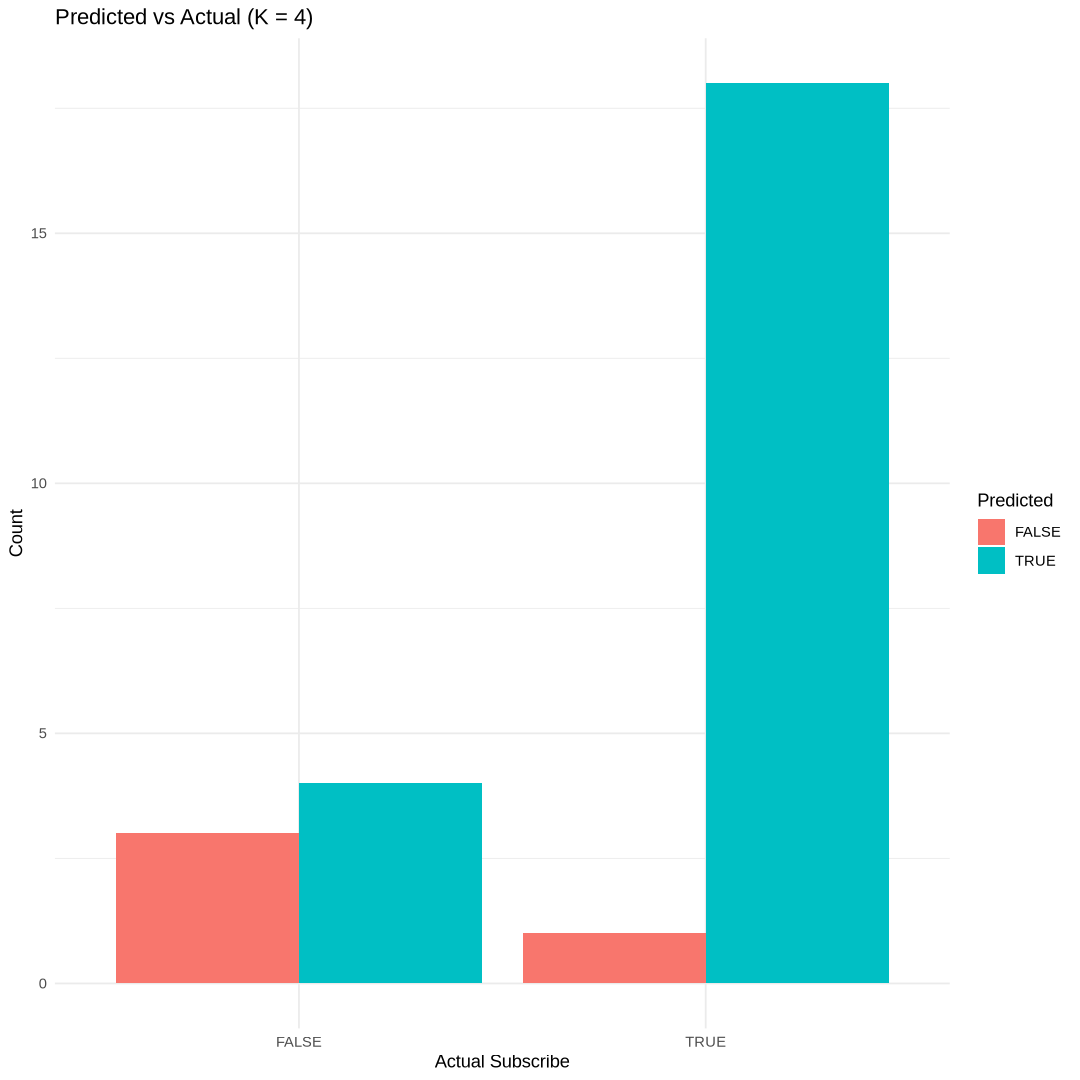

In [35]:
library(ggplot2)

df_model <- df |>
  select(subscribe, Age, experience, total_hours_played) |>
  mutate(subscribe = as.factor(subscribe))

set.seed(4321)
data_split <- initial_split(df_model, strata = subscribe, prop = 0.8)
train_data <- training(data_split)
test_data <- testing(data_split)

knn_recipe <- recipe(subscribe ~ ., data = train_data) |>
  step_normalize(all_numeric_predictors())

knn_model <- nearest_neighbor(mode = "classification", neighbors = 4) |>
  set_engine("kknn")

knn_workflow <- workflow() |>
  add_recipe(knn_recipe) |>
  add_model(knn_model)

knn_fit <- knn_workflow |>
  fit(data = train_data)

knn_predictions <- predict(knn_fit, test_data) |>
  bind_cols(test_data)

accuracy(knn_predictions, truth = subscribe, estimate = .pred_class)

table(Actual = knn_predictions$subscribe, Predicted = knn_predictions$.pred_class)

knn_predictions |>
  count(subscribe, .pred_class) |>
  ggplot(aes(x = subscribe, y = n, fill = .pred_class)) +
  geom_bar(stat = "identity", position = "dodge") +
  labs(title = "Predicted vs Actual (K = 4)", x = "Actual Subscribe", y = "Count", fill = "Predicted") +
  theme_minimal()